In [54]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data = loadmat("E:\ex3data1.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [56]:
type(data)

dict

In [57]:
X = data['X']

In [58]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
y = data['y']

In [60]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [61]:
X.shape

(5000, 400)

In [62]:
y.shape

(5000, 1)

In [63]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [64]:
np.unique(X)

array([-0.13196323, -0.11993388, -0.11220256, ...,  1.12024444,
        1.12393404,  1.1276883 ])

In [65]:
def computecost(X,y,theta):
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/(len(X))

In [66]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [67]:
X = np.insert(X,0,1,axis = 1)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [68]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [69]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(401))

In [70]:
X

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [71]:
y

matrix([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)

In [72]:
def gradientdescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(401))
    parameters = 401
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]= computecost(X,y,theta)
    return theta,cost

In [73]:
def getmodified(y,i):
    x=[]
    for j in range(len(y)):
        if y[j] != i:
            x.append(0)
        else:
            x.append(1)
            
    x = np.matrix(x)
    x = x.reshape(5000,1)
    return x  

In [74]:
y_1 = getmodified(y,1)
y_1

matrix([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [75]:
np.unique(y_1)

matrix([[0, 0, 0, ..., 1, 1, 1]])

In [76]:
y_1.shape

(5000, 1)

In [77]:
X.shape,y_1.shape,theta.shape

((5000, 401), (5000, 1), (1, 401))

In [78]:
all_theta =[]
for i in range(10):
    theta = np.matrix(np.zeros(401))
    y_1 = getmodified(y,i)
    final_theta,cost_matrix = gradientdescent(X,y_1,theta,0.001,100)
    all_theta.append(final_theta)
    
all_theta = np.matrix(np.array(all_theta))

In [79]:
all_theta

matrix([[-4.02355806e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -1.58834781e-07,  1.58293043e-08,  0.00000000e+00],
        [-3.15472923e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -1.37664922e-07,  1.63287755e-08,  0.00000000e+00],
        [-3.22393353e-02,  0.00000000e+00,  0.00000000e+00, ...,
          3.39807073e-07, -2.50707925e-08,  0.00000000e+00],
        ...,
        [-3.19259891e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -1.66961233e-07,  1.68287597e-08,  0.00000000e+00],
        [-3.24450540e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -1.68019155e-07,  1.68461310e-08,  0.00000000e+00],
        [-3.21242472e-02,  0.00000000e+00,  0.00000000e+00, ...,
         -1.66804783e-07,  1.67755308e-08,  0.00000000e+00]])

In [80]:
all_theta.shape

(10, 401)

In [81]:
all_theta[0]

matrix([[-4.02355806e-02,  0.00000000e+00,  0.00000000e+00,
         -6.70099889e-09,  8.03107899e-08,  1.51282525e-07,
         -4.77432683e-06, -6.11830981e-06, -3.69864209e-06,
         -1.05537493e-06, -1.90133741e-06, -5.89628275e-07,
          4.49738322e-07,  9.53155367e-07,  1.67900904e-06,
          2.59625757e-06,  1.84069385e-06,  5.36469567e-07,
          4.46236082e-09, -5.79442942e-09,  0.00000000e+00,
         -1.87297259e-09,  1.49676711e-08,  7.16736893e-08,
          1.35974208e-07,  1.06193091e-06, -7.04612989e-06,
         -2.54528370e-05, -3.85088160e-05, -3.03867047e-05,
         -1.20693297e-05,  3.67149927e-06,  8.33507807e-06,
          9.15053844e-06,  1.04892198e-05,  2.84544845e-06,
          1.22486337e-07,  1.99455013e-06,  2.14486741e-06,
          3.15047692e-07,  7.56122401e-08,  1.60261452e-08,
         -1.66952227e-07,  7.85778162e-07, -5.06277648e-06,
         -3.29508737e-05, -1.14976056e-04, -2.00110518e-04,
         -2.26168855e-04, -1.69645242e-0

In [82]:
predicted_prob = sigmoid(X*all_theta.T)
predicted_prob

matrix([[0.29868309, 0.31794316, 0.3348784 , ..., 0.32896907, 0.33833982,
         0.330395  ],
        [0.28311799, 0.30683937, 0.32090622, ..., 0.31659586, 0.32438396,
         0.31620224],
        [0.24734237, 0.27516688, 0.29253209, ..., 0.2852679 , 0.30127019,
         0.2881779 ],
        ...,
        [0.37686637, 0.39306945, 0.39929405, ..., 0.39714864, 0.40433887,
         0.40628277],
        [0.2665766 , 0.29443881, 0.30276885, ..., 0.31370753, 0.31392749,
         0.31811078],
        [0.30383461, 0.32024881, 0.34442026, ..., 0.34179858, 0.34321015,
         0.34122112]])

In [83]:
predicted_prob[0]

matrix([[0.29868309, 0.31794316, 0.3348784 , 0.33770385, 0.32597285,
         0.33888561, 0.33639089, 0.32896907, 0.33833982, 0.330395  ]])

In [84]:
#threshold = 0.58
#y_pred = [1 if  > threshold else 0 for X in predicted_prob]
#y = np.array(y).ravel()
#y

In [44]:
y_pred=np.argmax(predicted_prob,axis=1)+1#index of maximum probability
y_pred

matrix([[ 6],
        [ 6],
        [ 9],
        ...,
        [10],
        [10],
        [ 8]], dtype=int64)

In [45]:
y[3000]

matrix([[6]], dtype=uint8)

In [46]:
count = 0
for i in range(len(y_pred)):
    if y_pred[i]==y[i]:
        count += 1
print(count*100/len(y),'% accuracy')

1.68 % accuracy


[4]


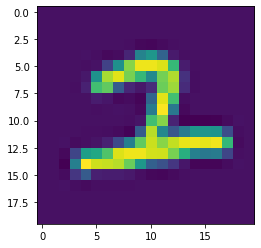

In [47]:
X = data['X']
y = data['y']
number = np.reshape(X[2096,:],(20,20))
plt.imshow(number)
print(y[2096])